# PROJECT BY: RITIK SURI

## The Sparks Foundation- Data Science & Business Analytics Intern

### TASK: Exploratory Data Analysis - Retail

- Problem statement is to try and find out the weak areas where you can work to make more profit and What all business problems you can derive by exploring the data?


### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
url='https://raw.githubusercontent.com/ritik1704/Retail_data_analysis/main/SampleSuperstore.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Understanding the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

### Checking for duplicate tuples and removing them if any.

In [6]:
df.duplicated().unique()

array([False,  True])

In [7]:
df.drop_duplicates(keep = False, inplace = True)

In [8]:
df.shape

(9960, 13)

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,55119.427912,230.440795,3.791867,0.156354,28.723476
std,32052.781498,624.198842,2.228208,0.206458,234.656076
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.332500,2.000000,0.000000,1.724800
50%,55901.000000,54.900000,3.000000,0.200000,8.671250
75%,90008.000000,209.972250,5.000000,0.200000,29.446425
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7285
dtype: int64

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
df.drop(['Country','Postal Code','City'], axis = 1, inplace = True)

In [13]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Visualization of data

In [14]:
df['Ship Mode'].value_counts()

Standard Class    5942
Second Class      1941
First Class       1536
Same Day           541
Name: Ship Mode, dtype: int64

In [15]:
(df['Ship Mode'].value_counts()/len(df['Ship Mode']))*100

Standard Class    59.658635
Second Class      19.487952
First Class       15.421687
Same Day           5.431727
Name: Ship Mode, dtype: float64

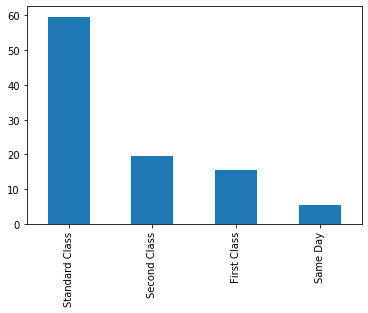

In [16]:
((df['Ship Mode'].value_counts()/len(df['Ship Mode']))*100).plot(kind='bar')

- <B> Around 60% of the items are shipped by Standard class

In [17]:
df['Segment'].value_counts()

Consumer       5175
Corporate      3010
Home Office    1775
Name: Segment, dtype: int64

In [18]:
(df['Segment'].value_counts()/len(df['Segment']))*100

Consumer       51.957831
Corporate      30.220884
Home Office    17.821285
Name: Segment, dtype: float64

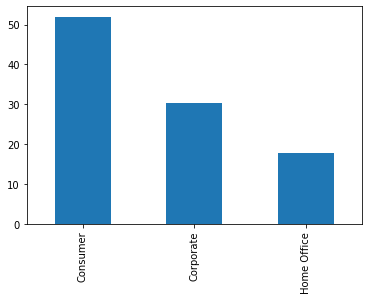

In [19]:
((df['Segment'].value_counts()/len(df['Segment']))*100).plot(kind='bar')

- <b> Around 51% of items belong to Consumer Segment

In [20]:
df['Region'].value_counts()

West       3183
East       2842
Central    2315
South      1620
Name: Region, dtype: int64

In [21]:
(df['Region'].value_counts()/len(df['Region']))*100

West       31.957831
East       28.534137
Central    23.242972
South      16.265060
Name: Region, dtype: float64

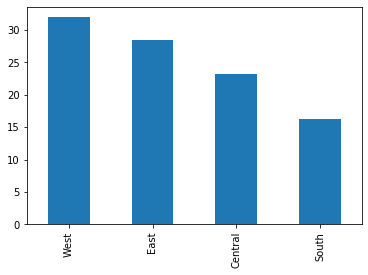

In [22]:
((df['Region'].value_counts()/len(df['Region']))*100).plot(kind='bar')

- <b> All four regions approximately equally contribute 

In [23]:
df['Category'].value_counts()

Office Supplies    5998
Furniture          2115
Technology         1847
Name: Category, dtype: int64

In [24]:
(df['Category'].value_counts()/len(df['Category']))*100

Office Supplies    60.220884
Furniture          21.234940
Technology         18.544177
Name: Category, dtype: float64

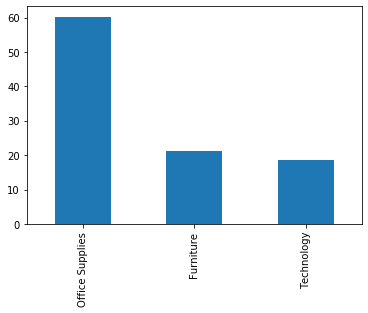

In [25]:
((df['Category'].value_counts()/len(df['Category']))*100).plot(kind='bar')

- <b> The most frequent category is 'Office Supplies'

In [26]:
df['Sub-Category'].value_counts()

Binders        1521
Paper          1348
Furnishings     955
Phones          889
Storage         846
Art             794
Accessories     775
Chairs          613
Appliances      466
Labels          362
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [27]:
(df['Sub-Category'].value_counts()/len(df['Sub-Category']))*100

Binders        15.271084
Paper          13.534137
Furnishings     9.588353
Phones          8.925703
Storage         8.493976
Art             7.971888
Accessories     7.781124
Chairs          6.154618
Appliances      4.678715
Labels          3.634538
Tables          3.202811
Envelopes       2.550201
Bookcases       2.289157
Fasteners       2.178715
Supplies        1.907631
Machines        1.154618
Copiers         0.682731
Name: Sub-Category, dtype: float64

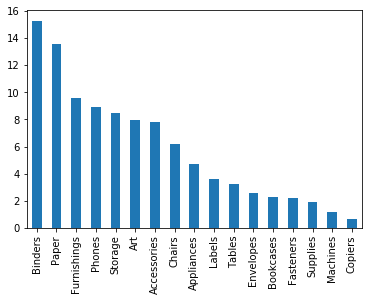

In [28]:
((df['Sub-Category'].value_counts()/len(df['Sub-Category']))*100).plot(kind='bar')

- <b> Binders and Papers are bought the most in the retail store

In [29]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200649,-0.028433,0.479070
Quantity,0.200649,1.000000,0.008734,0.066168
Discount,-0.028433,0.008734,1.000000,-0.219837
Profit,0.479070,0.066168,-0.219837,1.000000


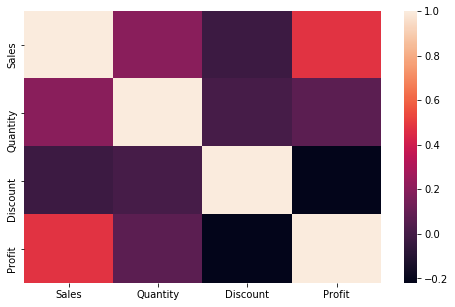

In [30]:
fig, axes = plt.subplots(1,1, figsize = (8,5))
sns.heatmap(df.corr())
plt.show()

- <b> Heatmap shows that Discount and profit are negatively correlated
- <b> Sales and Profit have good correlation of around 0.6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x720 with 0 Axes>

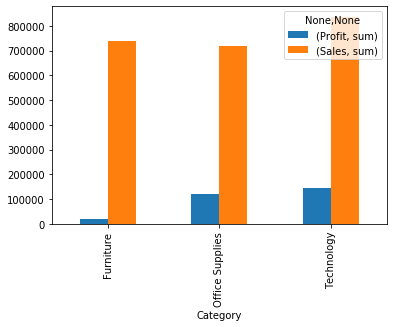

In [31]:
plt.figure(figsize=(10,10))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

- <b> Even though Sale of Furniture is good but profit made is very low.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1728x720 with 0 Axes>

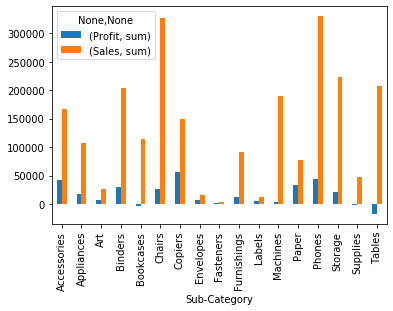

In [32]:
plt.figure(figsize=(24,10))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

- <b> Sales of Table is good but it is resulting into loss
- <b> Copiers is providing the most amount of profit with some moderate sales

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1728x720 with 0 Axes>

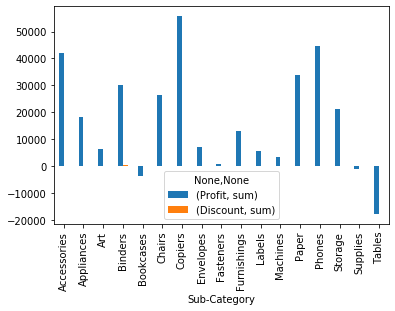

In [33]:
plt.figure(figsize=(24,10))
df.groupby('Sub-Category')['Profit','Discount'].agg(['sum']).plot.bar()
plt.show()

- <B> Sales of Tables amd Book Cases are contibuting towards the loss of retail store.

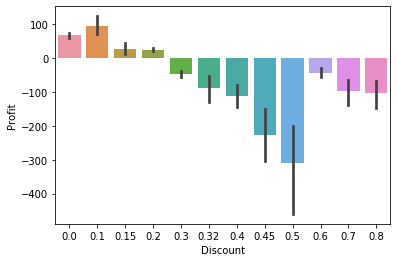

In [34]:
sns.barplot(x=df.Discount,y=df.Profit)

- <B> With the increase of discount after 0.2 profit starts to decrease which means we are provided with loss.

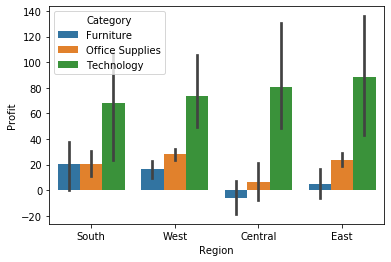

In [35]:
sns.barplot(x=df.Region, y=df.Profit,hue=df.Category)

- <B> In central region Furniture is making loss
- <B> Profit made the Technology is largest amongst the following categories.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


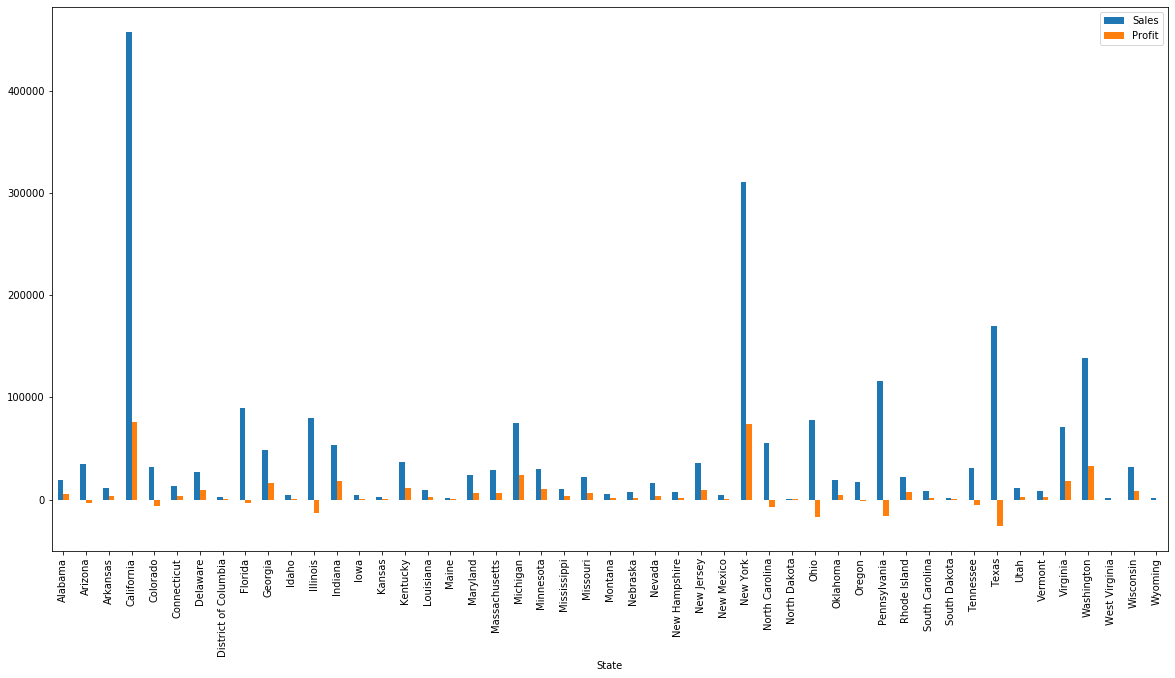

In [36]:
 df.groupby(['State'])['Sales', 'Profit'].sum().plot.bar(figsize = (20,10))

- <b> Sales in Ohio, pennsylvania, Texas, Illinois are providing loss
- <b> Sales in Newyork , California is providing huge profits.

## Final Conclusions 

### 1) Prices of Sub-Categories in furniture should be increased so that in order to earn more profits.
### 2) Production of table should be made less as it is resulting into huge losses.
### 3) Sales of Technology should be increased as it is potentially a good earner.
### 4) Sales and marketing of opiers should be done because it is earning the most profit.
### 5) Discount should not be given more than 0.2 as it is resulting into loss.
### 6) Sales in Ohio, pennsylvania, Texas, Illinois should be checked upon because these states are providing                 loss.